# *Heart Disease Prediction Using the K-Nearest Neighbours Algorithm*

Group 31:
Vansh Sidhu (63883342),
Aaron Yang (63331953),
Markus Westenenk (48027031),
Gabriel-Henri Martin (18564575)


Heart disease, a range of conditions that affect the heart, is a leading cause of morbidity and mortality globally, accounting for an estimated 18 million deaths annually (Mattingly, 2021). Given its prevalence within the global population, it’s important that healthcare workers are equipped with adequate tools and knowledge to diagnose these conditions. 

A skilled healthcare professional, though able to properly diagnose an individual through consultation, can only evaluate one at a time. It is an equally slow and tedious process. In order to facilitate their lives and allow them to work on more urgent cases, we will develop an algorithm to accurately assess and diagnose patients who may be at risk. 

Cleveland's database on heart disease, provided by the UCI Machine Learning Repository, has a total of 14 subsets (variables), which may or may not indicate an increased chance of heart disease. These variables range from physical condition (age, cholesterol, blood pressure, and heart rate) to physical attributes (sex and age). For the sake of this project, we will try to predict the heart disease diagnosis of a person based on their age, cholesterol levels, and resting blood pressure using the k-nearest neighbor algorithm.

Here are the variable information:

**age**: age in years 

**sex**: sex (1 = male; 0 = female) 

**cp**: chest pain type 
- Value 1: typical angina 
- Value 2: atypical angina 
- Value 3: non-anginal pain 
- Value 4: asymptomatic
  
**trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
  
**chol**: serum cholestoral in mg/dl 

**fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

**restecg**: resting electrocardiographic results 
- Value 0: normal 
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
  
**thalach**: maximum heart rate achieved
  
**exang**: exercise induced angina (1 = yes; 0 = no) 

**oldpea** = ST depression induced by exercise relative to rest 

**slope**: the slope of the peak exercise ST segment 
- Value 1: upsloping 
- Value 2: flat 
- Value 3: downsloping
  
**ca**: number of major vessels (0-3) colored by flourosopy
  
**thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect 

**num**: diagnosis of heart disease (angiographic disease status) 
- Value 0: < 50% diameter narrowing in any major vessel
- Value 1~4: > 50% diameter narrowing in any major vessel

## *Preliminary exploratory data analysis* 

In [1]:
library(tidyverse)
library(tidymodels)
set.seed(123)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
heart_disease <- read_csv("processed.cleveland.data", col_names = FALSE)
colnames(heart_disease) = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", 
                            "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_disease_converted <- heart_disease |>
                        mutate(age = as.integer(age), sex = as_factor(sex), cp = as_factor(cp), 
                               trestbps = as.integer(trestbps), chol = as.integer(chol), 
                               fbs = as_factor(fbs), restecg = as_factor(restecg), thalach = as.integer(thalach), 
                               exang = as_factor(exang), oldpeak = as.integer(oldpeak), slope = as_factor(slope), 
                               ca = as.integer(ca), thal = as_factor(thal), num = as.integer(num))
head(heart_disease_converted, 10)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.integer(ca)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>
63,1,1,145,233,1,2,150,0,2,3,0,6.0,0
67,1,4,160,286,0,2,108,1,1,2,3,3.0,2
67,1,4,120,229,0,2,129,1,2,2,2,7.0,1
37,1,3,130,250,0,0,187,0,3,3,0,3.0,0
41,0,2,130,204,0,2,172,0,1,1,0,3.0,0
56,1,2,120,236,0,0,178,0,0,1,0,3.0,0
62,0,4,140,268,0,2,160,0,3,3,2,3.0,3
57,0,4,120,354,0,0,163,1,0,1,0,3.0,0
63,1,4,130,254,0,2,147,0,1,2,1,7.0,2


In [3]:
heart_disease_mutated <- heart_disease_converted |>
                        mutate(diagnosis = case_when(num >= 1 ~ TRUE, num == 0 ~ FALSE)) |>
                        mutate(diagnosis = as_factor(diagnosis))
head(heart_disease_mutated)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagnosis
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>
63,1,1,145,233,1,2,150,0,2,3,0,6.0,0,FALSE
67,1,4,160,286,0,2,108,1,1,2,3,3.0,2,TRUE
67,1,4,120,229,0,2,129,1,2,2,2,7.0,1,TRUE
37,1,3,130,250,0,0,187,0,3,3,0,3.0,0,FALSE
41,0,2,130,204,0,2,172,0,1,1,0,3.0,0,FALSE
56,1,2,120,236,0,0,178,0,0,1,0,3.0,0,FALSE


The variable num represents if a patient is diagnosed with heart disease (value 1~4) or is absence of it (value 0). As we're using the K-nn algorithm to predict a patient's diagnosis, the response variable needs to be a factor. Therefore, we created a new variable "diagnosis" which represents if a person is diagnosed with heart disease or not depending on the value of the variable "num".

In [4]:
heart_disease_split <- initial_split(heart_disease_mutated, prop = 0.75, strata = diagnosis)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

In [30]:
nrow(filter(heart_disease_train, is.na(age) | is.na(trestbps) | is.na(chol) | is.na(diagnosis)))

[1] 0

The age, trestbps, diagnosis, and chol variables have no missing values in the training set.

In [12]:
group_by(heart_disease_train, diagnosis) |>
summarize(count= n(), avg_chol = mean(chol), median_chol = median(chol), avg_age = mean(age), avg_trestbps = mean(trestbps))

diagnosis,count,avg_chol,median_chol,avg_age,avg_trestbps
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,123,243.5691,235.0,52.94309,128.6504
TRUE,104,250.6058,253.5,55.83654,135.9808


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”


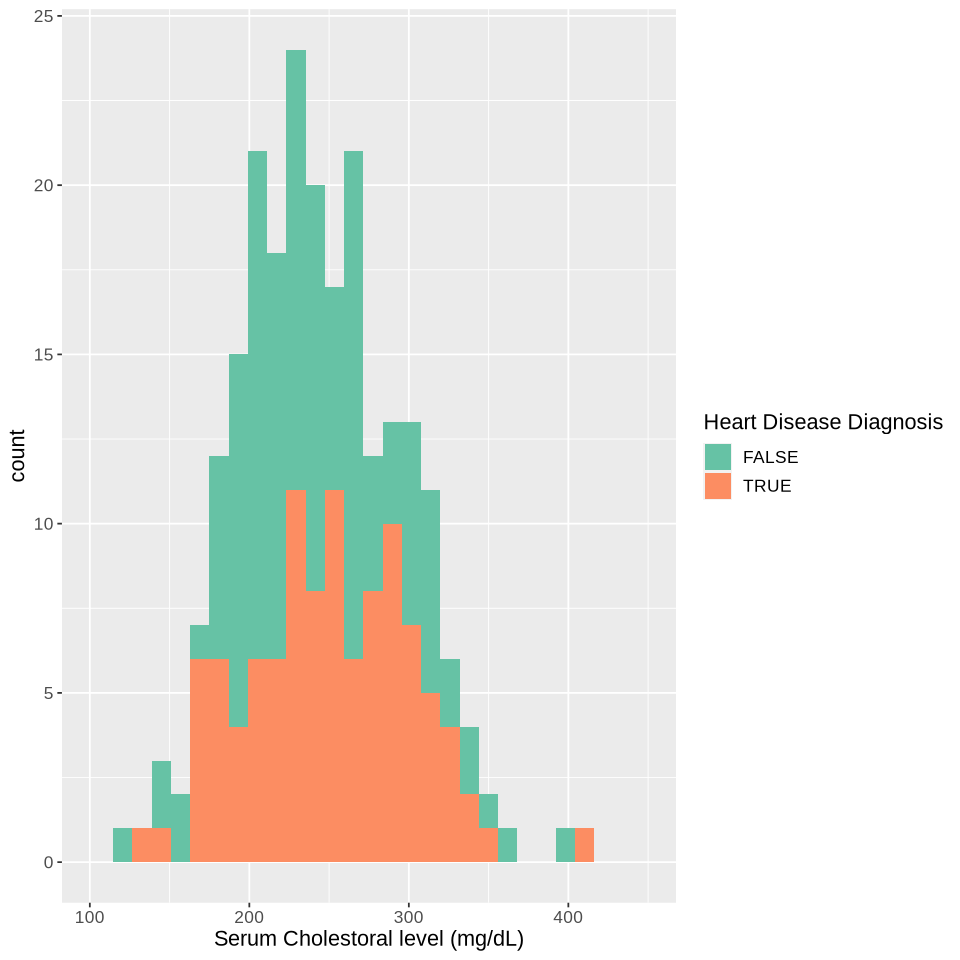

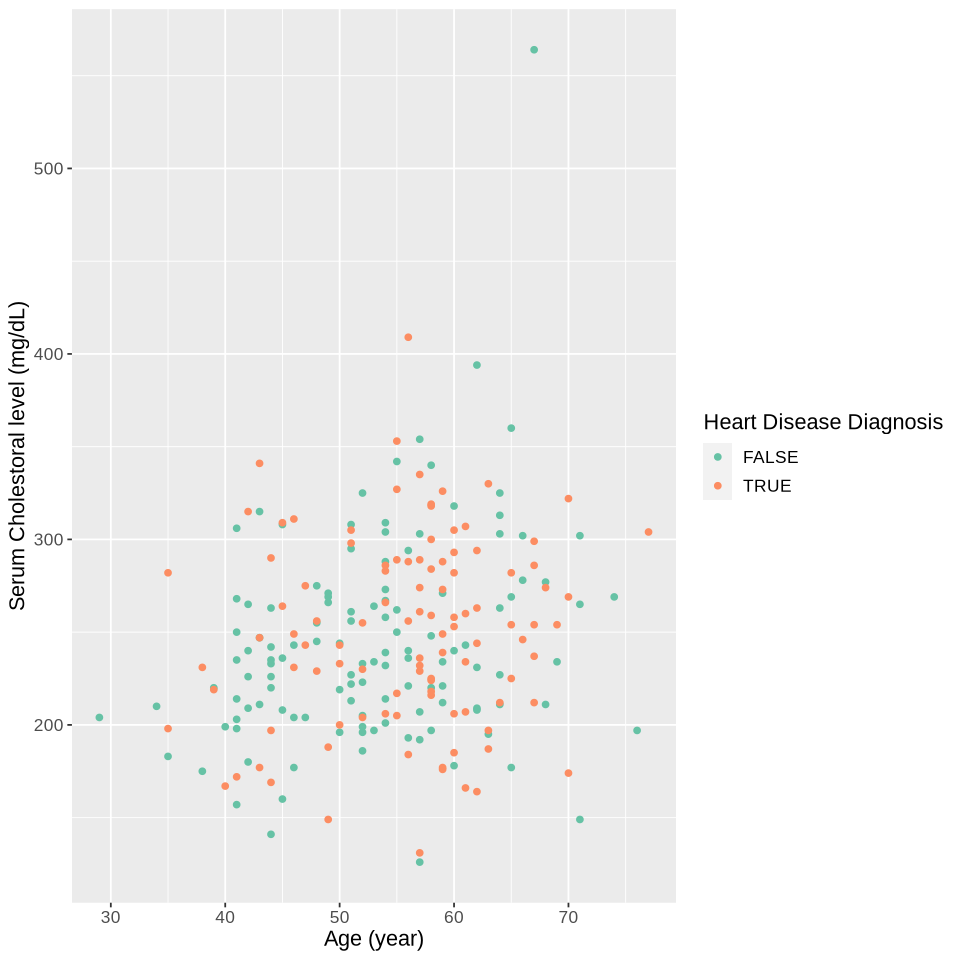

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


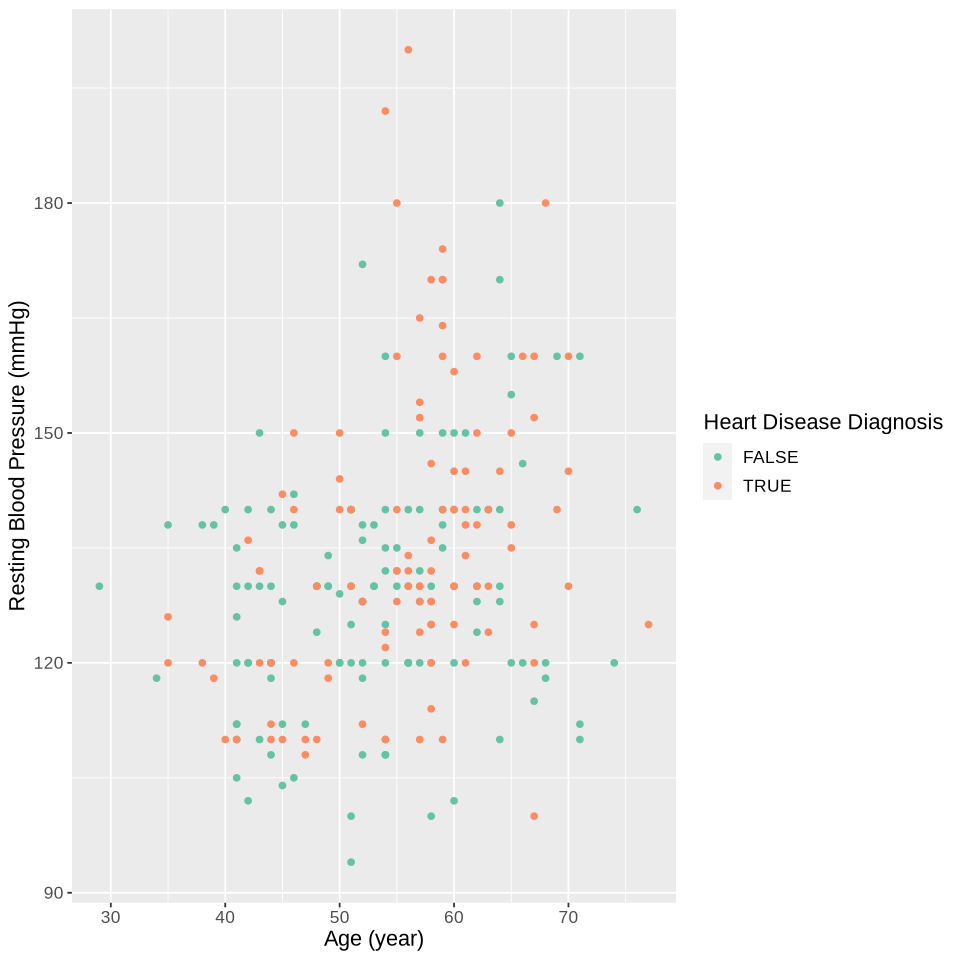

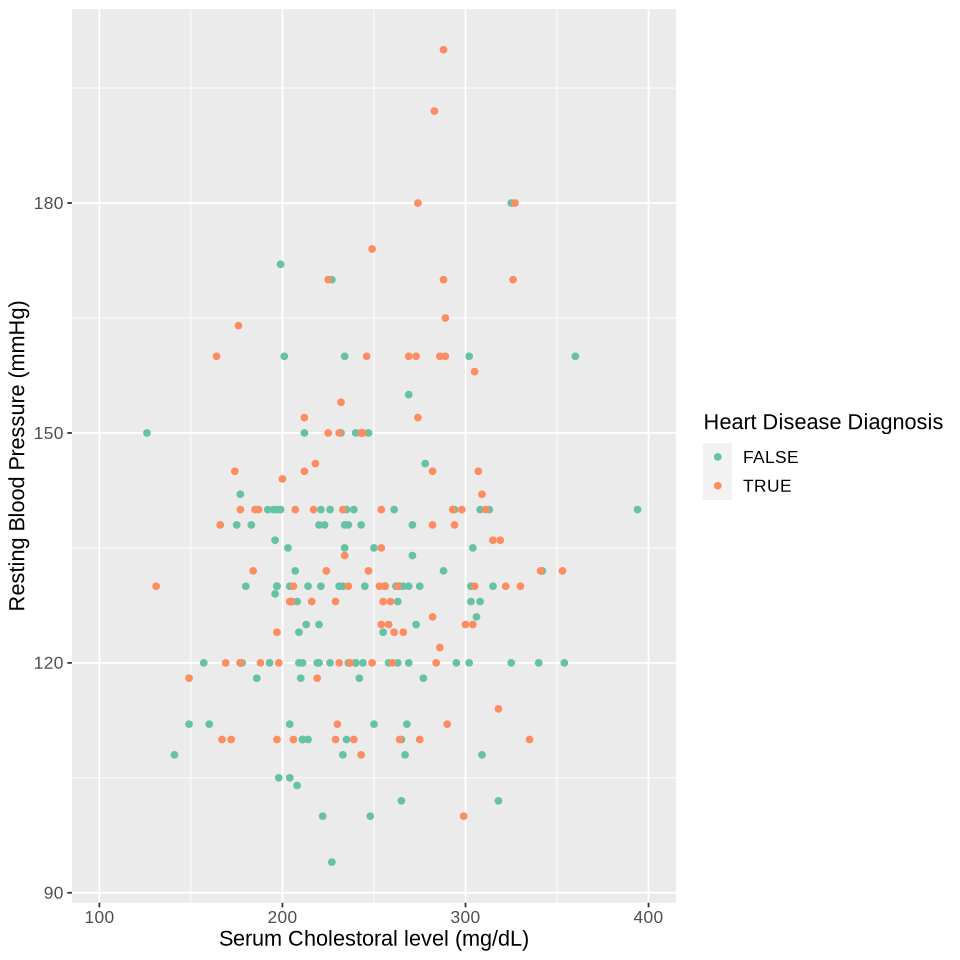

In [7]:
options(repr.plot.width=8, repr.plot.height=8)

chol_distribution <- heart_disease_train |>
                    ggplot(aes(x=chol, fill=diagnosis)) +
                    geom_histogram(position="stack") +
                    labs(x="Serum Cholestoral level (mg/dL)", fill = "Heart Disease Diagnosis") +
                    xlim(100,450) +
                    scale_fill_brewer(palette = "Set2") +
                    theme(text= element_text(size=13))
chol_distribution

chol_vs_age_plot <- heart_disease_train |>
                ggplot(aes(x=age,y=chol,colour=diagnosis)) +
                geom_point() +
                labs(x="Age (year)", y="Serum Cholestoral level (mg/dL)", colour = "Heart Disease Diagnosis") +
                scale_colour_brewer(palette = "Set2") +
                theme(text= element_text(size=13))
chol_vs_age_plot

trestbps_vs_age_plot <- heart_disease_train |>
                ggplot(aes(x=age,y=trestbps,colour=diagnosis)) +
                geom_point() +
                labs(x="Age (year)", y="Resting Blood Pressure (mmHg)", colour = "Heart Disease Diagnosis") +
                scale_colour_brewer(palette = "Set2") +
                theme(text= element_text(size=13))
trestbps_vs_age_plot

trestbps_vs_chol_plot <- heart_disease_train |>
                ggplot(aes(x=chol,y=trestbps,colour=diagnosis)) +
                geom_point() +
                labs(x="Serum Cholestoral level (mg/dL)", y="Resting Blood Pressure (mmHg)", colour = "Heart Disease Diagnosis") +
                xlim(100,400) +
                scale_colour_brewer(palette = "Set2") +
                theme(text= element_text(size=13))
trestbps_vs_chol_plot

# *Methods*

# *Expected Outcomes and Significance*

- Expectations: We anticipate a strong correlation between age, cholesterol levels, resting blood pressure, and heart disease diagnosis. Older individuals and those with elevated cholesterol or blood pressure are likely to have a higher risk of heart disease. We aim to identify specific patterns and combinations of these variables indicative of heart disease risk through this model. 

- Impact: If successful, this predictive model could help many patients by allowing an early identification of high-risk individuals. Healthcare professionals could then implement treatments, such as lifestyle modifications or medical treatments, to stop disease progression. Additionally, deeper insights into the underlying mechanisms could start the development of more effective techniques to prevent heart disease from starting or progressing.

- Future Questions: Further research may explore interactions of these factors with gender, lifestyle, or genetics in heart disease risk. Additionally, investigating the factors and variables into the predictive model could enhance its accuracy and give better results. As our understanding grows, new questions will emerge, and more research will be done about heart disease and cardiovascular health.

# Citations

- Quinn Mattingly. (11 June 2021). Cardiovascular Diseases. WHO. https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1